#

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap # custom colormaps
import matplotlib.image as mpimg # load images
from matplotlib.gridspec import GridSpec # image grids (like patchwork)
import matplotlib as mpl

import nilearn as nl # nilearn for loading nifti
from nilearn.image.image import mean_img
from nilearn.plotting import plot_epi, show
import nibabel as nib # nibable: loading nifti
from nilearn import plotting # nilearn plotting
import os

import numpy as np

from PIL import Image # image resizing
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns

import kaleido

In [2]:
figpath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Manuscript/images/'

In [3]:
def apply_slice_cut_to_nifti(nii_gz_path, slice_cut):
    """
    Load a NIfTI image, apply a slice cut to extract a subregion, and return a new NIfTI image.

    Parameters:
    - nii_gz_path (str): Path to the input NIfTI (.nii.gz) file.
    - slice_cut (list): Slice cut specification in the form [slice_x, slice_y, slice_z].

    Returns:
    - nibabel.Nifti1Image: New NIfTI image object containing the extracted subregion.
    """
    # Load the NIfTI image
    nii_img = nib.load(nii_gz_path)
    nii_data = nii_img.get_fdata()

    # Extract the subregion using the slice cut
    slice_x, slice_y, slice_z = slice_cut
    subregion_data = nii_data[slice_x, slice_y, slice_z]

    # Create a new NIfTI image with the extracted subregion and original affine matrix
    subregion_img = nib.Nifti1Image(subregion_data, nii_img.affine)

    return subregion_img

In [4]:
basepath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Data_from_BCCHRI/'

/tmp/ipykernel_1803751/1724496745.py:5: FutureWarning:

From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.


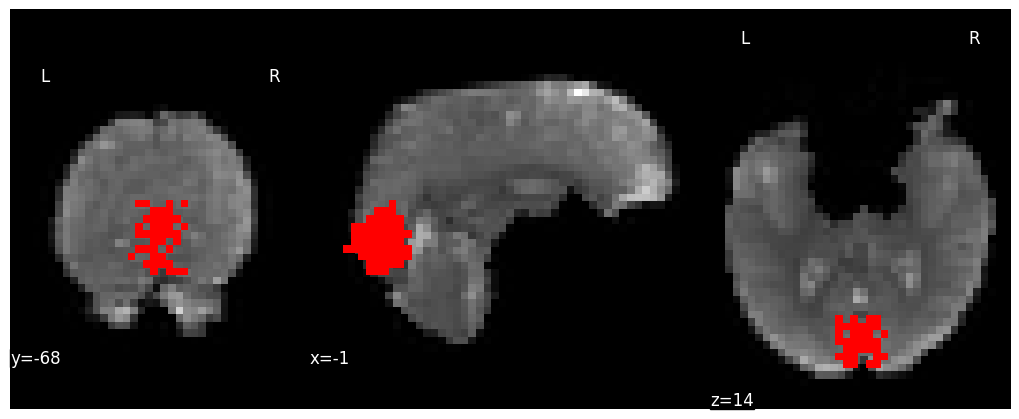

In [98]:
nii_gz_relpath = 'derivatives/tedana/sub-Pilot10/rest/desc-optcomDenoised_bold.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

nii_img = nib.load(nii_gz_path)
nii_img = nl.image.crop_img(nii_img)

overlay_relpath = 'derivatives/hurst/sub-Pilot10/rest/gm_voxel_mask_space-BOLD_rest.nii.gz'
overlay_path = basepath + overlay_relpath

overlay_img = nib.load(overlay_path)

# Set the number of rows and columns for the subplot grid

fmrimrsgm = plot_epi(mean_img(nii_img, 
    copy_header=True), 
    colorbar= False,                           
    #cbar_tick_format="%.2f",
    vmin=0, vmax=3200, 
    cbar_tick_format="%i", 
    cmap=plt.cm.gray, 
    black_bg=True, 
    draw_cross=False,
    annotate=True,
    cut_coords=(-1,-68,14),
    #radiological=True,
    figure=plt.figure(figsize=(10,4)))

redcolors = ['red']
custom_cmapred = ListedColormap(redcolors)

fmrimrsgm.add_overlay(overlay_img, cmap=custom_cmapred)
#plt.figure(figsize=(10,4))
plt.savefig(figpath + "SampleMask.png", dpi=300, bbox_inches="tight")

plt.show()

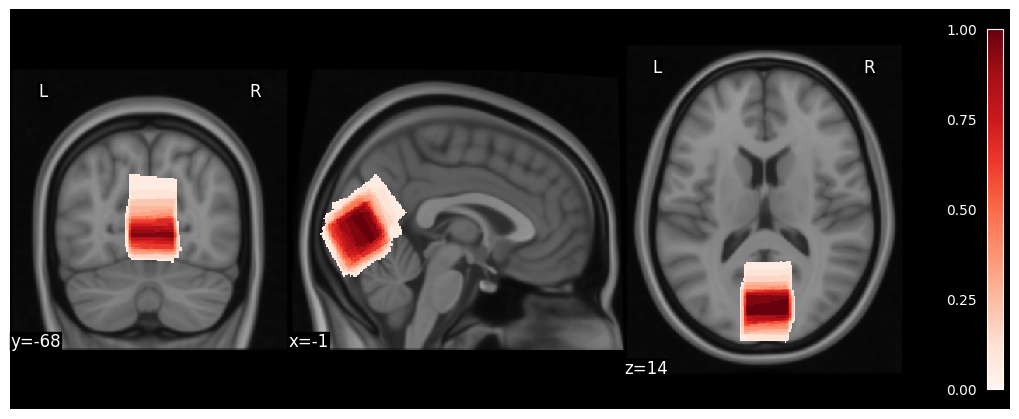

In [93]:
nii_gz_relpath = 'derivatives/VoxelAverage/MNI152_T1_0.5mm.nii.gz'
nii_gz_path = basepath + nii_gz_relpath
nii_img = nib.load(nii_gz_path)

overlay_relpath = 'derivatives/VoxelAverage/Voxels_Average.nii.gz'
overlay_path = basepath + overlay_relpath
overlay_img = nib.load(overlay_path)

display = plotting.plot_stat_map(
    bg_img = nii_img,
    stat_map_img = overlay_img,
    vmin=0.00, vmax=1, 
    colorbar= True,                           
    cbar_tick_format="%.2f",
    cmap = "Reds",
    black_bg=True, 
    draw_cross=False,
    annotate=True,
    cut_coords=(-1,-68,14),
    figure=plt.figure(figsize=(10,4)))

plt.savefig(figpath + "MRSVoxelAverage.png", dpi=300, bbox_inches="tight")

plt.show()

In [8]:
# Define nodes (categories in the flow)
nodes = [
    "", 
    "Not Scanned:<br>1", 
    "", 
    "MRS FWHM<br>> 10: 2",
    "", 
    "fMRI MeanFD<br>> 0.15: 5",
    "",
    ""
]

# Define links between nodes
sources = [0, 0, 2, 2, 4, 4, 6]  # Indices of source nodes
targets = [1, 2, 3, 4, 5, 6, 7]  # Indices of target nodes
values = [1, 26, 2, 24, 5, 19, 19]  # Corresponding counts

# Generate Seaborn colors
colors = sns.color_palette("husl", len(nodes))  # Generate 8 unique colors
rgba_colors = [f'rgba({int(r*255)},{int(g*255)},{int(b*255)},0.7)' for r, g, b in colors]  # Convert to rgba
rgba_colors_links = [f'rgba({int(r*255)},{int(g*255)},{int(b*255)},0.4)' for r, g, b in colors]  # Lower opacity for links

# Assign colors based on node indices
node_colors = rgba_colors
link_colors = [rgba_colors_links[s] for s in sources]  # Match link color to source node

# Override specific nodes (1, 3, 5) to be red
for i in [1, 3, 5]:
    rgba_colors[i] = 'rgba(255,0,0,0.7)'  # Red color

y_positions = [0.5, 1.1, .47, .97, 0.44, .8, 0.36, 0.36]  
x_positions = [0, 0.3, 0.3, 0.5, 0.5, 0.75, 0.745, 1.02]

# Create Sankey figure
fig = go.Figure(go.Sankey(
    node=dict(
        pad=40,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        align='left',
        color=node_colors,
        x = x_positions,
        y = y_positions
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # Set link colors to match source node with lower opacity
    )
))

fontsize=12
fontweight = 600

fig.update_layout(
    font=dict(size=fontsize, family="Arial", color="black", weight = fontweight),
    width=700,   # Set width in pixels
    height=300,    # Set height in pixels
    margin=dict(l=10, r=120, t=5, b=50)
)
fig.update_layout(
    annotations=[
        dict(
            x=1.2,  # Position it slightly to the right of the last node
            y=0.9,   # Adjust this based on the vertical position of the final node
            xref="paper", 
            yref="paper",
            text="Final Analysis:<br>19",
            showarrow=False,
            align='left'
        ),
        # Annotations for key nodes
        dict(
            x=0.04, y=.9,  # Align to the top of 'Recruited
            xref="paper", yref="paper",
            text="Recruited:<br>27",
            showarrow=False,
            align='left'
        ),
        dict(
            x=0.37, y=0.9,  # Align to the top of 'Scanned'
            xref="paper", yref="paper",
            text="Scanned:<br>26",
            showarrow=False,
            align='left'
        ),
        dict(
            x=0.59, y=0.9,  # Align to the top of 'MRS FWHM ≤ 10'
            xref="paper", yref="paper",
            text="MRS FWHM<br>≤ 10: 24",
            showarrow=False,
            align='left'
        ),
        dict(
            x=0.91, y=0.9,  # Align to the top of 'fMRI MeanFD ≤ 0.15'
            xref="paper", yref="paper",
            text="fMRI MeanFD<br>≤ 0.15: 19",
            showarrow=False,
            align='left'
        )
    ]
)

fig.show()
pio.write_image(fig, figpath + "ParticipantFlow.png", scale=3)

/tmp/ipykernel_1803751/3161300070.py:4: FutureWarning:

From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.


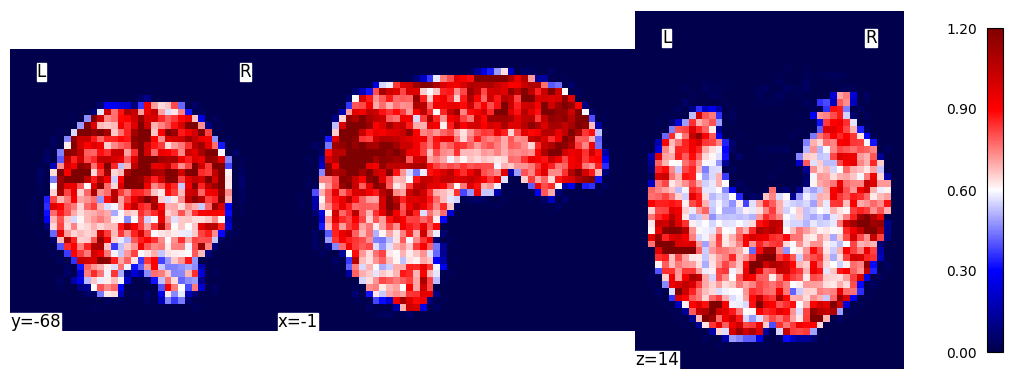

In [103]:
nii_gz_relpath = 'derivatives/hurst/sub-Pilot10/rest/desc-optcomDenoised_bold_WelchHurst_fullfreq.nii.gz'
nii_gz_path = basepath + nii_gz_relpath
nii_img = nib.load(nii_gz_path)
nii_img = nl.image.crop_img(nii_img)

display = plotting.plot_epi(
    epi_img = nii_img,
    vmin=0.00, vmax=1.2, 
    colorbar= True,                           
    cbar_tick_format="%.2f",
    cmap = "seismic",
    black_bg=False, 
    draw_cross=False,
    annotate=True,
    cut_coords=(-1,-68,14),
    figure=plt.figure(figsize=(10,3.6)))

plt.savefig(figpath + "HurstSample.png", dpi=300, bbox_inches="tight")

plt.show()

In [24]:
psdpath='/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Data_from_BCCHRI/participant_measures/psd_data/rest/'

In [42]:
import pandas as pd

subjects = pd.read_csv("/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/EI_Hurst/Manuscript/notebooks/Subjects_for_analysis.csv")
my_list = subjects['df.Subject'].to_list()

print(my_list)  # Output: [1, 2, 3, 4, 5]
file_list = [f"{psdpath}psd_fullfreq_sub-Pilot{str(i).zfill(2)}.csv" for i in my_list]

[1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26]

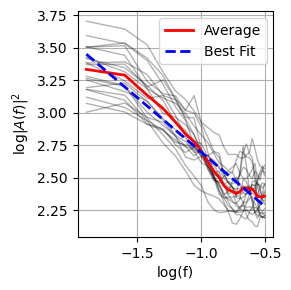

In [65]:
# Initialize the plot
plt.figure(figsize=(3,3))

# Lists to store all y-values for averaging
all_y = []

# Loop through the file list and plot
for file in file_list:
    df = pd.read_csv(file)  # Load CSV
    x = df['X']
    y = df['Y']
    all_y.append(y)
    plt.plot(x, y, color='black', alpha=0.3, linewidth=1)  # Transparent black lines

# Calculate and plot the average in red
mean_y = np.mean(all_y, axis=0)
plt.plot(x, mean_y, color='red', linewidth=2, label='Average')

# Fit and plot a line of best fit in red
coeffs = np.polyfit(x, mean_y, deg=1)
best_fit = np.poly1d(coeffs)
plt.plot(x, best_fit(x), color='blue', linestyle='--', linewidth=2, label='Best Fit')

# Customize the plot
plt.xlabel("log(f)")
plt.ylabel(r'$\log |A(f)|^2$')
#plt.title("PSD with Individual Lines, Average, and Best Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig(figpath + "PSDs.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
